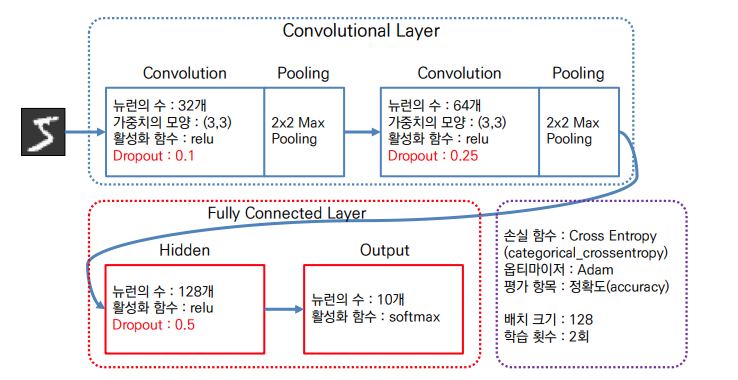

In [1]:
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape(-1, 28, 28, 1) / 255.0
test_X = test_X.reshape(-1, 28, 28, 1) / 255.0

print("train_X shape : ", train_X.shape)
print("test_X shape : ", test_X.shape)

train_X shape :  (60000, 28, 28, 1)
test_X shape :  (10000, 28, 28, 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
filename = "model-digits.h5"
checkpoint = ModelCheckpoint(filepath=filename, monitor="val_accuracy", save_best_only=True, verbose=1)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), callbacks=[checkpoint, early_stopping], batch_size=128, epochs=10)

Epoch 1/10
468/469 [============================>.] - ETA: 0s - loss: 0.3257 - accuracy: 0.8979
Epoch 1: val_accuracy improved from -inf to 0.98150, saving model to model-digits.h5
469/469 [==============================] - 13s 27ms/step - loss: 0.3254 - accuracy: 0.8980 - val_loss: 0.0586 - val_accuracy: 0.9815
Epoch 2/10
  5/469 [..............................] - ETA: 13s - loss: 0.0694 - accuracy: 0.9844

C:\Users\KOSA\anaconda3\envs\tf2.14\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/469 [============================>.] - ETA: 0s - loss: 0.1067 - accuracy: 0.9675
Epoch 2: val_accuracy improved from 0.98150 to 0.98630, saving model to model-digits.h5
469/469 [==============================] - 13s 27ms/step - loss: 0.1066 - accuracy: 0.9675 - val_loss: 0.0403 - val_accuracy: 0.9863
Epoch 3/10
467/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9768
Epoch 3: val_accuracy improved from 0.98630 to 0.98800, saving model to model-digits.h5
469/469 [==============================] - 13s 27ms/step - loss: 0.0776 - accuracy: 0.9768 - val_loss: 0.0350 - val_accuracy: 0.9880
Epoch 4/10
468/469 [============================>.] - ETA: 0s - loss: 0.0679 - accuracy: 0.9801
Epoch 4: val_accuracy improved from 0.98800 to 0.99000, saving model to model-digits.h5
469/469 [==============================] - 12s 27ms/step - loss: 0.0679 - accuracy: 0.9801 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 5/10
467/469 [============================>.] - ETA: 0

In [10]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9925


[0.023043859750032425, 0.9925000071525574]

In [11]:
from tensorflow.keras.models import load_model
model = load_model("model-digits.h5")

In [37]:
import cv2
import numpy as np
cap = cv2.VideoCapture(1)

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, bin_img = cv2.threshold(g_img, 110, 255, cv2.THRESH_BINARY_INV)
            contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            try:
                for contour in contours:
                    (x,y), radius = cv2.minEnclosingCircle(contour)
                    if radius > 5:
                        xs, xe = int(x-radius), int(x+radius)
                        ys, ye = int(y-radius), int(y+radius)
                        cv2.rectangle(bin_img, (xs,ys), (xe,ye), (200,0,0), 1)
                        roi = bin_img[ys:ye, xs:xe]
                        roi = cv2.resize(roi, dsize=(50,50))
                        roi = cv2.resize(roi, dsize=(24,24))
                        A = np.zeros((28, 28))
                        A[2:-2, 2:-2] = roi
                        A = A.reshape(-1,28,28,1)
                        num = np.argmax(model.predict(A))
                        cv2.putText(bin_img, str(num), (xs,ys), cv2.FONT_HERSHEY_PLAIN, 2, (200, 0,0))
            except Exception as e:
                print(e)
            cv2.imshow("Camera", bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
            else:
                print("No Frame")
                break
else : 
    print("Camera not opened")

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 14ms/step
No Frame
